In [1]:
from image_generation import generate_test_image
from conjugate_gradient import cg_main
import numpy as np
import matplotlib.pyplot as plt
from multigrid import multigrid_main_iterative
from PCG import pcg_main


Elapsed times (seconds):
k = 6: 0.1984 s
k = 7: 0.3069 s
k = 8: 2.4482 s
k = 9: 45.4183 s


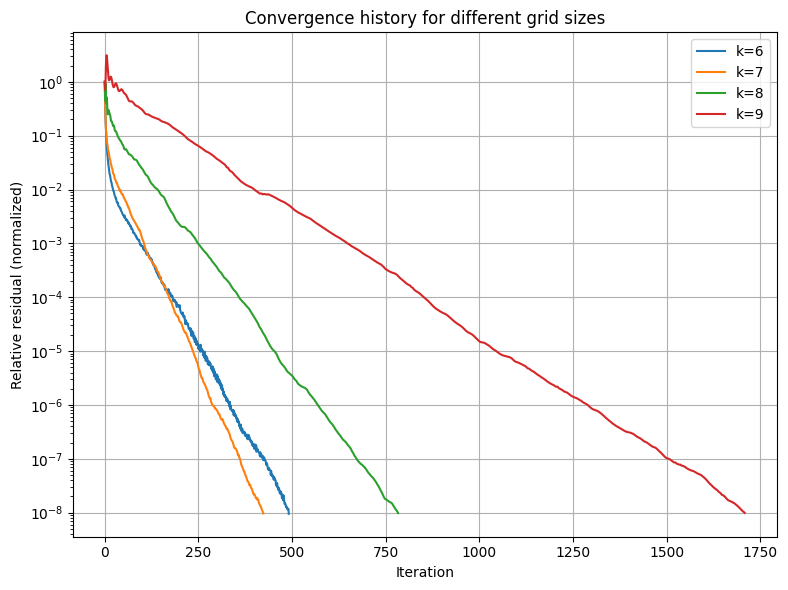

In [2]:
ks = range(6, 10)

# Storage
times = []
residuals = []

for k in ks:
    reg = 4 ** (k - 4)
    N = 2 ** k

    # Generate synthetic image pair
    I1, I2 = generate_test_image(N, testcase=2)

    # Run CG solver
    u, v, res, max_iter, elapsed_time = cg_main(I1, I2, reg)

    # Normalize residuals by their first entry
    res = np.array(res) / res[0]

    # Store data
    times.append(elapsed_time)
    residuals.append(res)

# Print timing results
print("\nElapsed times (seconds):")
for k, t in zip(ks, times):
    print(f"k = {k}: {t:.4f} s")

# Plot all residual histories together
plt.figure(figsize=(8, 6))
for k, res in zip(ks, residuals):
    plt.plot(res, label=f"k={k}")

plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Relative residual (normalized)")
plt.title("Convergence history for different grid sizes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



PCG elapsed times (seconds):
k = 6: 66.1022 s
k = 7: 0.4954 s
k = 8: 0.7860 s
k = 9: 2.2383 s


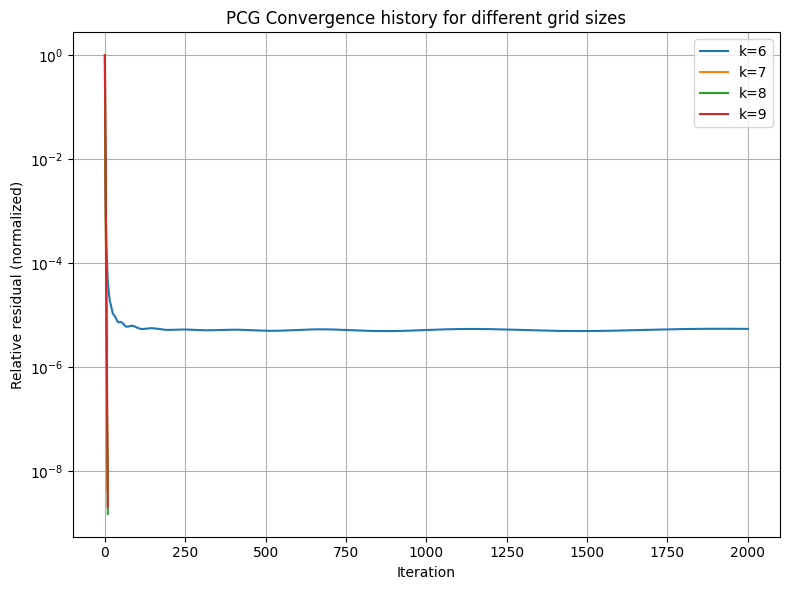

In [3]:
ks = range(6, 10)

# Storage
times = []
residuals = []

for k in ks:
    reg = 4 ** (k - 4)
    N = 2 ** k

    # Generate synthetic image pair
    I1, I2 = generate_test_image(N, testcase=2)

    # Run PCG solver
    u, v, res, it, elapsed_time = pcg_main(
        I1, I2, reg,
        max_level=3,   # choose your MG depth for the preconditioner
        s1=2,          # pre-smoothing
        s2=2,          # post-smoothing
        tol=1e-8,
        maxit=200
    )

    # Normalize residuals exactly like CG
    res = np.array(res) / res[0]

    # Store results
    times.append(elapsed_time)
    residuals.append(res)

# Print timing results
print("\nPCG elapsed times (seconds):")
for k, t in zip(ks, times):
    print(f"k = {k}: {t:.4f} s")

# Plot convergence history
plt.figure(figsize=(8, 6))
for k, res in zip(ks, residuals):
    plt.plot(res, label=f"k={k}")

plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Relative residual (normalized)")
plt.title("PCG Convergence history for different grid sizes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Multigrid elapsed times (seconds):
k = 6: 2.3156 s
k = 7: 0.8693 s
k = 8: 1.7668 s
k = 9: 8.5421 s


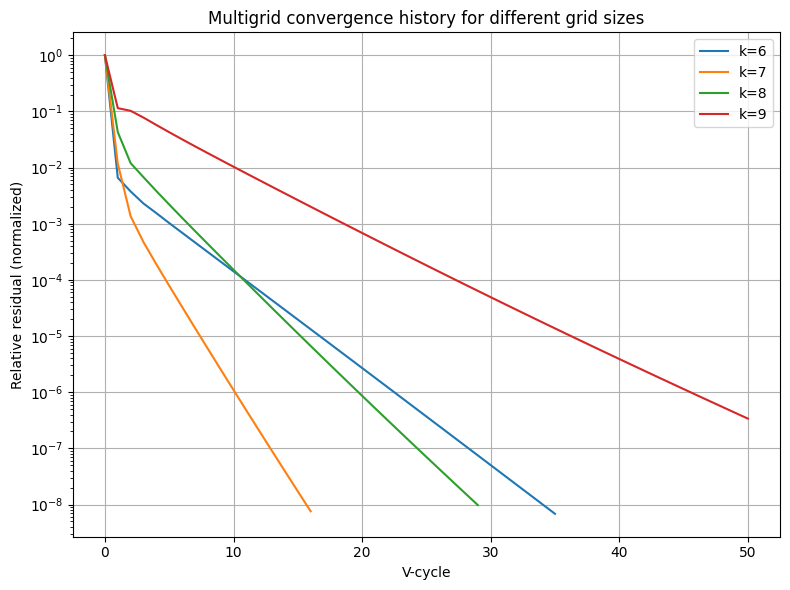

In [4]:
ks = range(6, 10)

# Storage
times = []
residuals = []

for k in ks:
    reg = 4 ** (k - 4)
    N = 2 ** k

    # Generate synthetic image pair
    I1, I2 = generate_test_image(N, testcase=2)

    # Run MULTIGRID solver
    u, v, res, elapsed_time = multigrid_main_iterative(
        I1, I2, reg,
        s1=2,          # pre-smoothing
        s2=2,          # post-smoothing
        max_level=k-4, # or fixed like 4; depends on your MG setup
        tol=1e-8,
        max_cycles=50
    )

    # Normalize residuals by their first entry
    res = np.array(res) / res[0]

    # Store data
    times.append(elapsed_time)
    residuals.append(res)

# Print timing results
print("\nMultigrid elapsed times (seconds):")
for k, t in zip(ks, times):
    print(f"k = {k}: {t:.4f} s")

# Plot all residual histories together
plt.figure(figsize=(8, 6))
for k, res in zip(ks, residuals):
    plt.plot(res, label=f"k={k}")

plt.yscale('log')
plt.xlabel("V-cycle")
plt.ylabel("Relative residual (normalized)")
plt.title("Multigrid convergence history for different grid sizes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def run_all_methods(ks, testcase=1, mg_s1=2, mg_s2=2, mg_max_level=3):

    results = {
        "CG": {"times": [], "residuals": []},
        "MG": {"times": [], "residuals": []},
        "PCG": {"times": [], "residuals": []},
    }

    for k in ks:
        reg = 4 ** (k - 4)
        N = 2 ** k

        # synthetic images
        I1, I2 = generate_test_image(N, testcase=testcase)

        # -------- CG --------
        u, v, res, max_iter, elapsed = cg_main(I1, I2, reg)
        res = np.array(res) / res[0]
        results["CG"]["times"].append(elapsed)
        results["CG"]["residuals"].append(res)

        # -------- PCG --------
        u, v, res, max_iter, elapsed = pcg_main(
            I1, I2, reg,
            max_level=mg_max_level,
            s1=mg_s1,
            s2=mg_s2,
            tol=1e-8,
            maxit=200
        )
        res = np.array(res) / res[0]
        results["PCG"]["times"].append(elapsed)
        results["PCG"]["residuals"].append(res)

        # -------- Multigrid --------
        u, v, res, elapsed = multigrid_main_iterative(
            I1, I2, reg,
            s1=mg_s1,
            s2=mg_s2,
            max_level=mg_max_level,
            tol=1e-8,
            max_cycles=50
        )
        res = np.array(res) / res[0]
        results["MG"]["times"].append(elapsed)
        results["MG"]["residuals"].append(res)

    return results


In [14]:
def plot_convergence_subplots(ks, results):
    methods = ["CG", "MG", "PCG"]
    titles = ["CG Convergence", "Multigrid Convergence", "PCG Convergence"]

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for ax, method, title in zip(axes, methods, titles):
        res_list = results[method]["residuals"]

        for k, res in zip(ks, res_list):
            ax.plot(res, label=f"k={k}")

        ax.set_yscale("log")
        ax.set_xlabel("Iteration / V-cycle")
        ax.set_ylabel("Relative residual")
        ax.set_title(title)
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()

In [15]:
def plot_time_scaling_subplots(ks, results):
    methods = ["CG", "MG", "PCG"]
    titles = ["CG Time Scaling", "Multigrid Time Scaling", "PCG Time Scaling"]

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    Ns = [2**k for k in ks]

    for ax, method, title in zip(axes, methods, titles):
        times = results[method]["times"]

        ax.plot(Ns, times, "-o")
        ax.set_xscale("log", base=2) 
        ax.set_yscale("log")
        ax.set_xlabel("Grid size N = 2^k")
        ax.set_ylabel("Time (seconds)")
        ax.set_title(title)
        ax.grid(True)

    plt.tight_layout()
    plt.show()

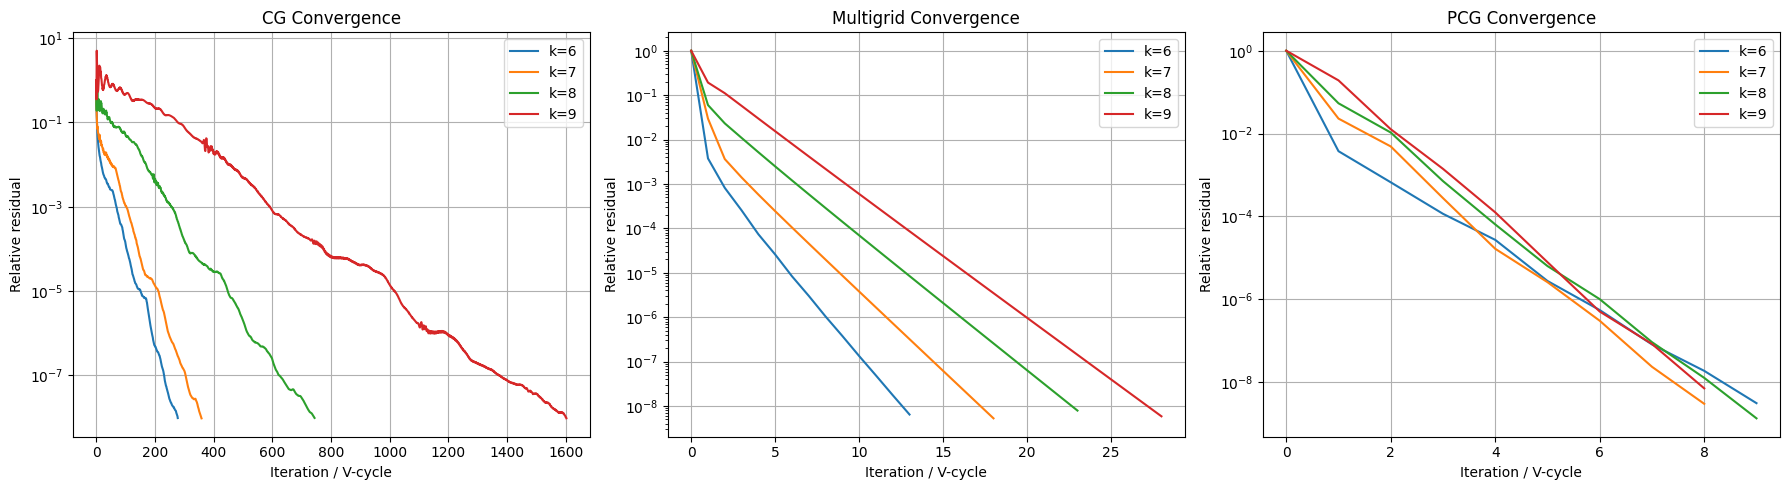

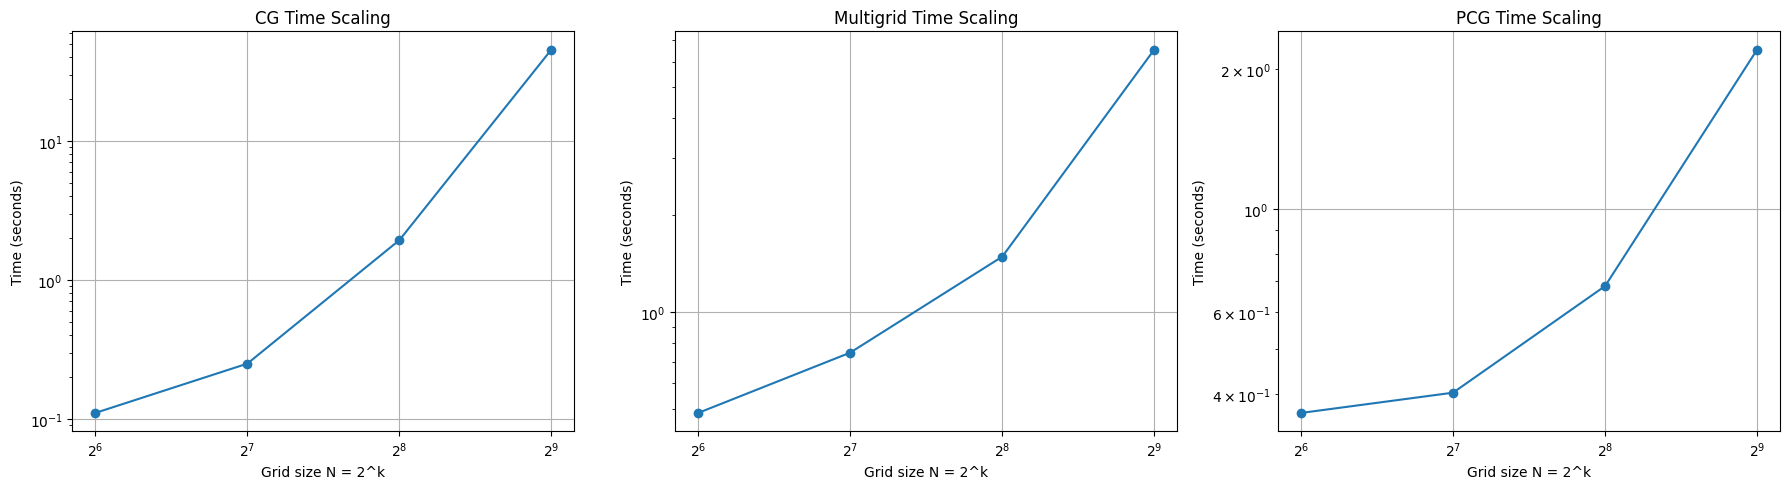

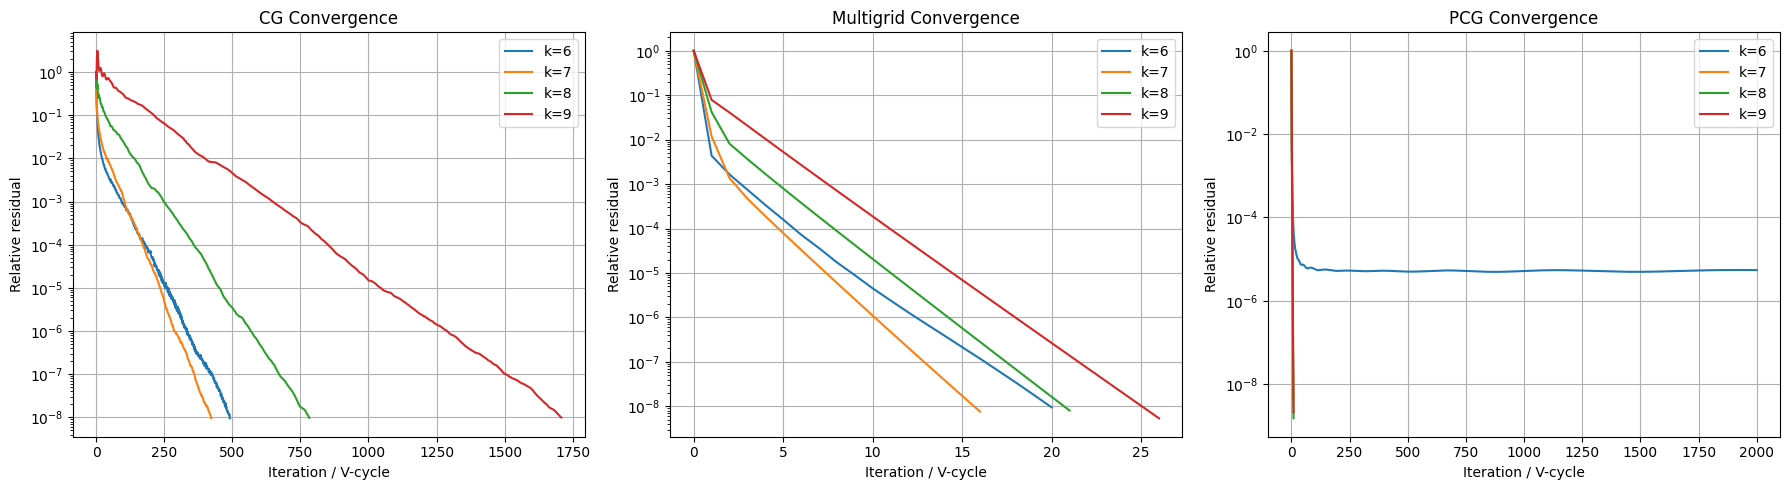

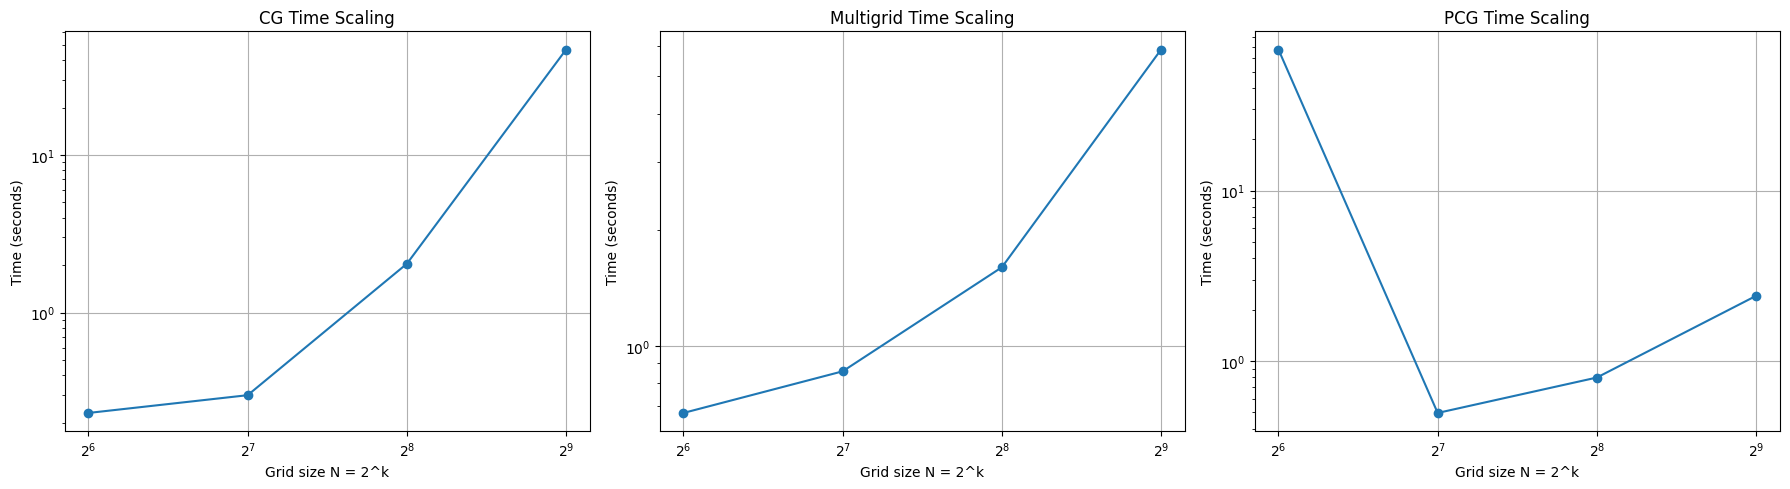

In [ ]:
ks = range(6, 10)

results = run_all_methods(
    ks,
    testcase=1,
    mg_s1=2,
    mg_s2=2,
    mg_max_level=3
)

plot_convergence_subplots(ks, results)
plot_time_scaling_subplots(ks, results)
ks = range(6, 10)

results = run_all_methods(
    ks,
    testcase=2,
    mg_s1=2,
    mg_s2=2,
    mg_max_level=3
)

plot_convergence_subplots(ks, results)
plot_time_scaling_subplots(ks, results)

In [22]:
def run_mg_test(N, testcase, reg, s1, s2, max_level):
    I1, I2 = generate_test_image(N, testcase=testcase)

    u, v, res, elapsed = multigrid_main_iterative(
        I1, I2, reg,
        s1=s1,
        s2=s2,
        max_level=max_level,
        tol=1e-8,
        max_cycles=50
    )

    res = np.array(res) / res[0]
    return res, elapsed


In [23]:
def sweep_levels(N, testcase, reg, levels, s1=2, s2=2):
    results = {}
    for L in levels:
        res, t = run_mg_test(N, testcase, reg, s1, s2, L)
        results[L] = {"res": res, "time": t}
    return results


In [24]:
def sweep_pre_smoothing(N, testcase, reg, pre_values, s2=2, max_level=3):
    results = {}
    for s1 in pre_values:
        res, t = run_mg_test(N, testcase, reg, s1, s2, max_level)
        results[s1] = {"res": res, "time": t}
    return results


In [25]:
def sweep_post_smoothing(N, testcase, reg, post_values, s1=2, max_level=3):
    results = {}
    for s2 in post_values:
        res, t = run_mg_test(N, testcase, reg, s1, s2, max_level)
        results[s2] = {"res": res, "time": t}
    return results


In [26]:
def plot_mg_sweep(results, title, xlabel):
    plt.figure(figsize=(8,6))
    for param, data in results.items():
        plt.plot(data["res"], label=f"{xlabel}={param}")

    plt.yscale("log")
    plt.xlabel("V-cycle")
    plt.ylabel("Relative residual")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [27]:
def plot_mg_times(results, xlabel):
    params = list(results.keys())
    times = [results[p]["time"] for p in params]

    plt.figure(figsize=(6,4))
    plt.bar(params, times)
    plt.xlabel(xlabel)
    plt.ylabel("Time (s)")
    plt.title("Multigrid total runtime")
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


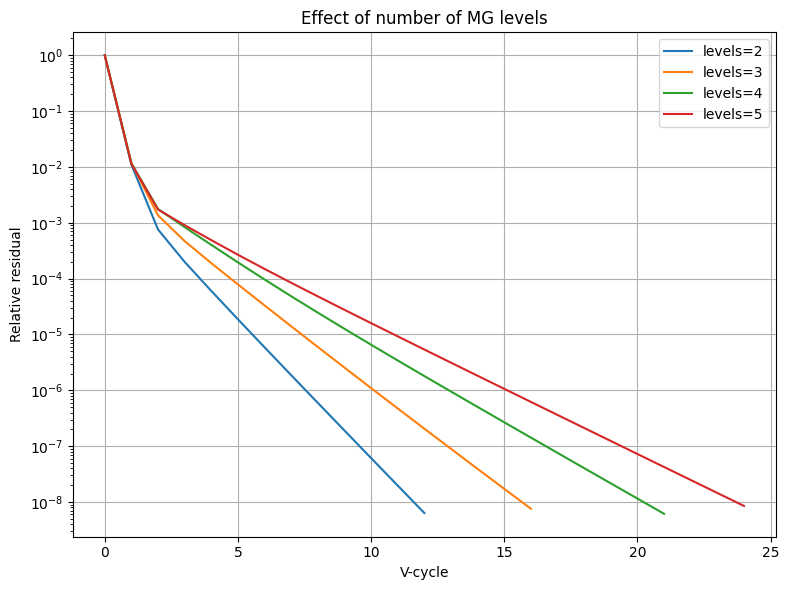

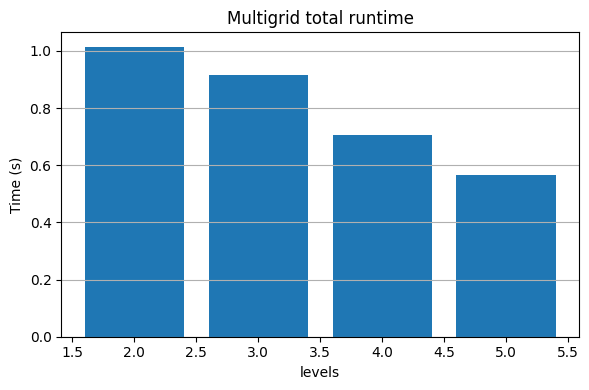

In [28]:
N = 128
testcase = 2
reg = 4**(7-4)

levels = [2, 3, 4, 5]
results = sweep_levels(N, testcase, reg, levels)

plot_mg_sweep(results, "Effect of number of MG levels", "levels")
plot_mg_times(results, "levels")


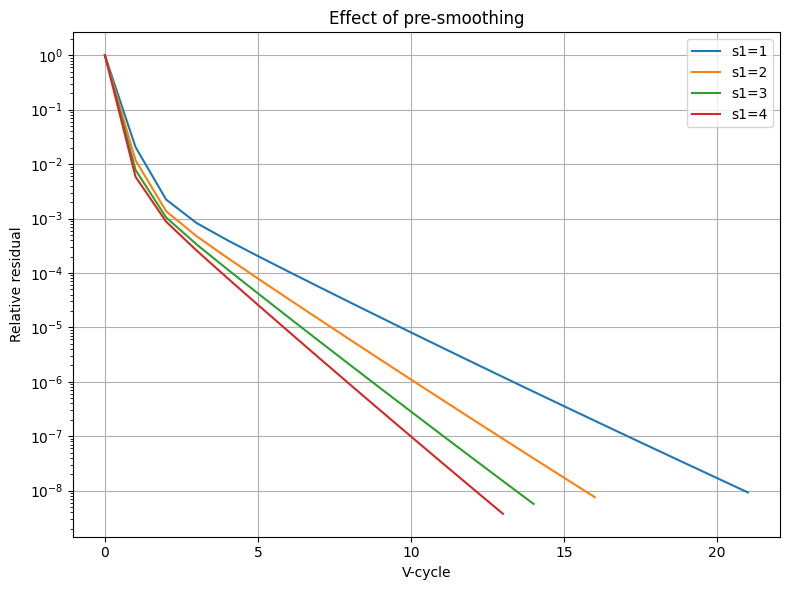

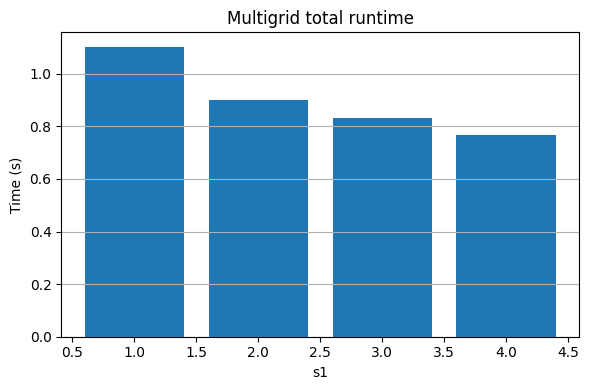

In [29]:
pre_vals = [1,2,3,4]
results = sweep_pre_smoothing(N, testcase, reg, pre_vals)

plot_mg_sweep(results, "Effect of pre-smoothing", "s1")
plot_mg_times(results, "s1")


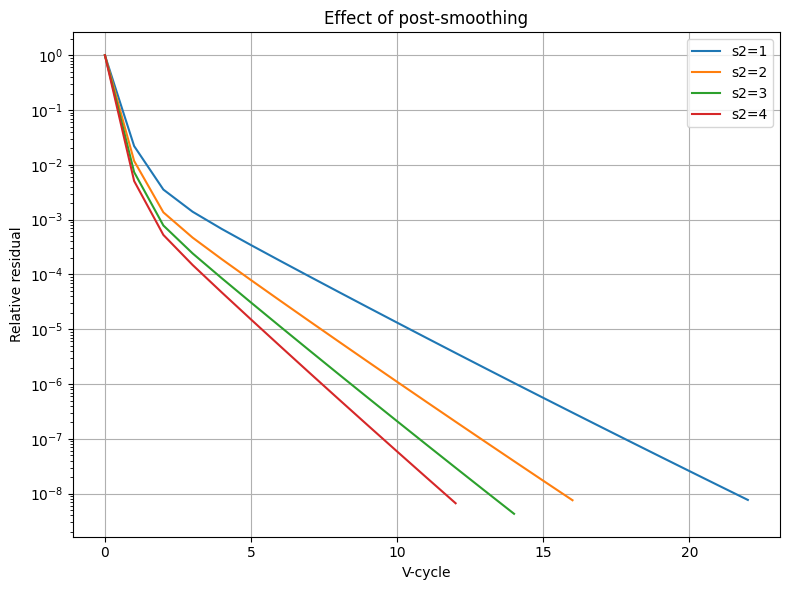

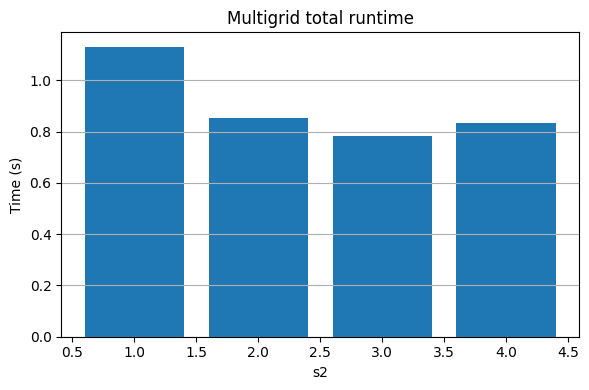

In [30]:
post_vals = [1,2,3,4]
results = sweep_post_smoothing(N, testcase, reg, post_vals)

plot_mg_sweep(results, "Effect of post-smoothing", "s2")
plot_mg_times(results, "s2")
